In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn import model_selection,cross_validation,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [12]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion',
       'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']

In [13]:
df=pd.read_csv(url,names=names)

In [14]:
df.apply(lambda x:sum(x.isnull()),axis=0)

id                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [15]:
df.replace('?',-9999,inplace=True)
df.drop(['id'],1,inplace=True)
print(df.shape)
df.axes

(699, 10)


[RangeIndex(start=0, stop=699, step=1),
 Index(['clump_thickness', 'uniformity_of_cell_size',
        'uniformity_of_cell_shape', 'marginal_adhesion',
        'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
        'normal_nucleoli', 'mitoses', 'class'],
       dtype='object')]

In [16]:
df.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


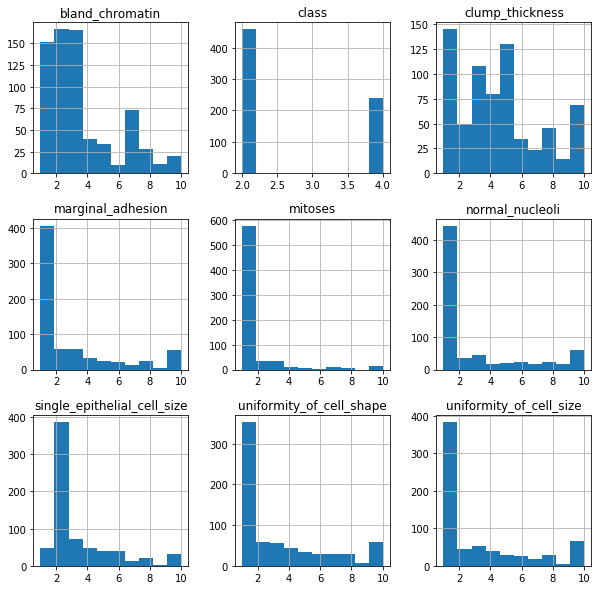

In [24]:
df.hist(figsize=(10,10))
plt.show()

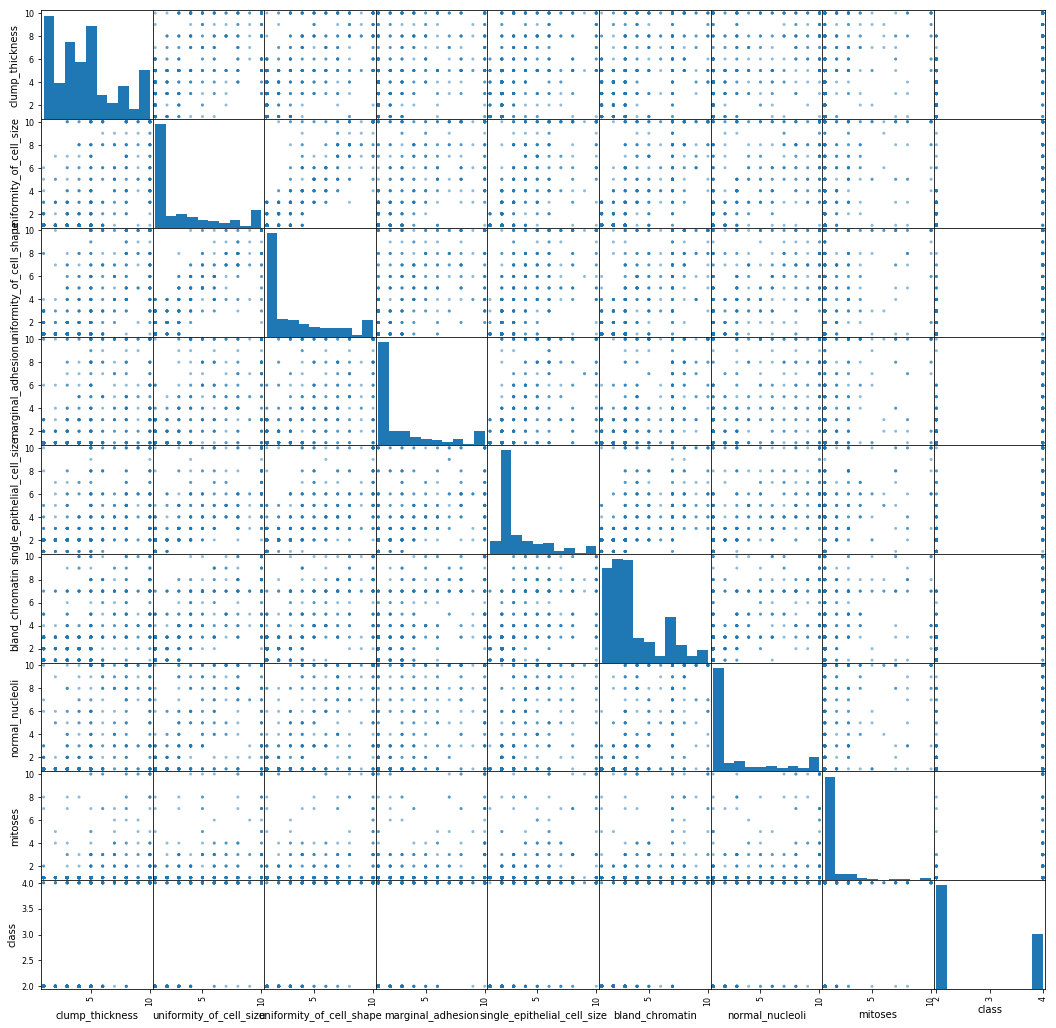

In [26]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [27]:
X=np.array(df.drop(['class'],1))
y=df['class']
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [34]:
models=[]
models.append(('KNN: ',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM: ',SVC()))

In [40]:
result=[]
names=[]

for name,model in models:
    kFold=model_selection.KFold(n_splits=10,random_state=8)
    cv_result=model_selection.cross_val_score(model,X_train,y_train,cv=kFold,scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    msg="%s %f (%f)" %(name,cv_result.mean(),cv_result.std())
    print(msg)

KNN:  0.969610 (0.017924)
SVM:  0.949968 (0.031711)


In [41]:
for name,model in models:
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,prediction))
    print(classification_report(y_test,prediction))

KNN: 
0.9571428571428572
             precision    recall  f1-score   support

          2       0.96      0.98      0.97        87
          4       0.96      0.92      0.94        53

avg / total       0.96      0.96      0.96       140

SVM: 
0.9642857142857143
             precision    recall  f1-score   support

          2       0.99      0.95      0.97        87
          4       0.93      0.98      0.95        53

avg / total       0.97      0.96      0.96       140



In [54]:
clf=SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

example=np.array([[4,2,1,1,1,8,10,1,2]])
example=example.reshape(len(example),9)
prediction=clf.predict(example)
print(prediction)

0.9642857142857143
[4]
